In [1]:
import glob
import numpy as np
from numpy import array

from keras.metrics import mean_squared_error
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Input, Reshape, ConvLSTM1D, Flatten, Dropout, MaxPooling1D, MaxPooling2D, Bidirectional
from keras.backend import set_session

import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd

if tf.test.gpu_device_name():
    print("GPU {}".format(tf.test.gpu_device_name()))

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
def convertToNDarray(data: list[str], format):
    df = pd.DataFrame()
    for fragment in data:
        csv = pd.read_csv(fragment)
        csv = csv.transpose()
        df = pd.concat([df, csv])
        
    return np.array(df).reshape(format)

In [79]:
def showData(data1, data2, column, raw):
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = [13, 5]
    column = 9
    raw = 2

    axs = []
    counterAxis = 0
    conterData1 = 0
    conterData2 = 0

    for i in range(0, column * raw):
        if i % 2 == 0:
            axs.append(fig.add_subplot(column, 2, i + 1))
            axs[counterAxis].plot(data1[conterData1], linewidth=0.8)
            axs[counterAxis].get_yaxis().set_ticks([])
            conterData1 += 1
            counterAxis += 1
        else:
            axs.append(fig.add_subplot(column, 2, i + 1))
            axs[counterAxis].plot(data2[conterData2], linewidth=0.8)
            axs[counterAxis].get_yaxis().set_ticks([])
            conterData2 += 1
            counterAxis += 1
            
    axs[0].set_title('Input')
    axs[1].set_title('Output')



In [57]:
filesTrainX = glob.glob("../dataset/train/trainX/*.csv")
filesTrainY = glob.glob("../dataset/train/trainY/*.csv")

filesValX = glob.glob("../dataset/val/valX/*.csv")
filesValY = glob.glob("../dataset/val/valY/*.csv")

format = (100,24,800)

X_train = convertToNDarray(filesTrainX, format)
Y_train = convertToNDarray(filesTrainY, format)

X_val = convertToNDarray(filesValX, format)
Y_val = convertToNDarray(filesValY, format)


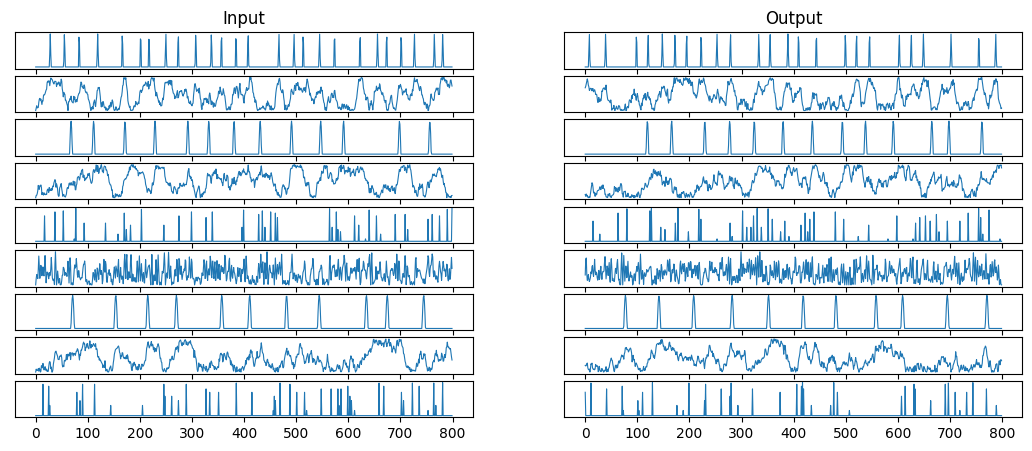

In [80]:
showData(X_train[5], Y_train[5], 2, 2)

In [ ]:
showData(Y_train[0], 2, 2)

In [63]:
# define model

num_timesteps = int(800)
num_features = int(24)

inputs = Input(shape=(24,800))
# x = ConvLSTM1D(filters=64, kernel_size=(1), activation='relu')(inputs)
# x = Flatten()(x)
x = LSTM(800, return_sequences=False)(inputs)
x = Dropout(0.2)(x)

# x = LSTM(512, return_sequences=True)(x)
# x = LSTM(256, return_sequences=False)(x)
d = Dense(24 * 800, activation='linear')(x)
outputs = Reshape((24,800))(d)

model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.save('./another.h5')

In [64]:
# Обучение модели
his = model.fit(X_train, Y_train, epochs=10, batch_size=1, verbose=1, validation_data=(X_val,Y_val))

model.save('first_monster.h5')

Epoch 1/10
100/100 [==============================] - 32s 299ms/step - loss: 985.8694 - accuracy: 8.3333e-04 - val_loss: 703.2552 - val_accuracy: 0.0029
Epoch 2/10
100/100 [==============================] - 29s 294ms/step - loss: 600.9354 - accuracy: 0.0033 - val_loss: 546.6396 - val_accuracy: 0.0029
Epoch 3/10
100/100 [==============================] - 30s 299ms/step - loss: 528.5535 - accuracy: 0.0025 - val_loss: 525.7735 - val_accuracy: 0.0050
Epoch 4/10
100/100 [==============================] - 31s 307ms/step - loss: 519.7681 - accuracy: 0.0033 - val_loss: 523.6517 - val_accuracy: 0.0042
Epoch 5/10
100/100 [==============================] - 29s 292ms/step - loss: 518.9489 - accuracy: 0.0050 - val_loss: 523.6555 - val_accuracy: 0.0029
Epoch 6/10
100/100 [==============================] - 30s 296ms/step - loss: 518.6951 - accuracy: 0.0033 - val_loss: 523.9804 - val_accuracy: 0.0025
Epoch 7/10
100/100 [==============================] - 30s 297ms/step - loss: 518.8796 - accuracy: 0.00

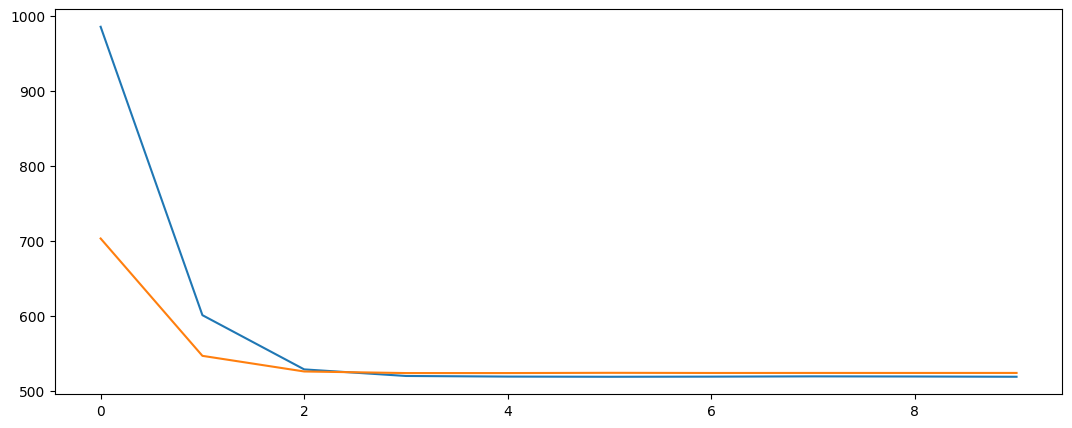

In [65]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

4/4 [==============================] - 0s 41ms/step
424.9987259112534


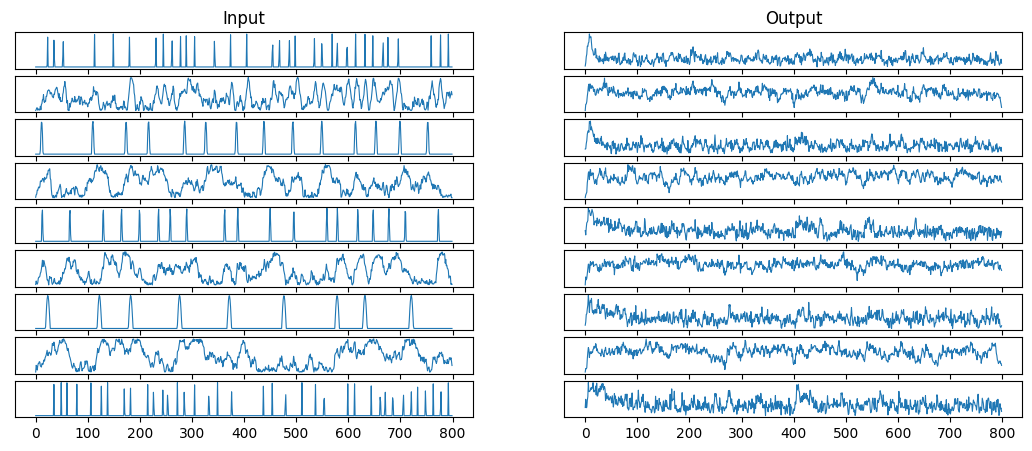

In [82]:
result = model.predict(X_train)

showData(X_train[0], result[0], 2, 3)

plt.plot()
plt.plot()


threshold = 10
# Оценка результатов
# mse = np.mean(np.power(result[0][2] - X_train[0][2], 2))
# anomalies = np.where(mse > threshold)[0]
# print(mse)
pass